In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [ ]:
df=pd.read_csv('/content/Data_Negara_HELP.csv')
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df1=df.copy()
df1.drop(['Negara'],axis=1,inplace=True)
df1


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:

def get_lower_upper_bound(x):
  q1=np.percentile(x,25)
  q3=np.percentile(x,75)
  iqr=q3-q1
  lower_bound = q1-(iqr*1.5)
  upper_bound = q3 + (iqr*1.5)
  return lower_bound,upper_bound

def get_outlier_iqr(x):
  lower_bound,upper_bound = get_lower_upper_bound(x)
  return x[np.where((x>upper_bound)|(x<lower_bound))]


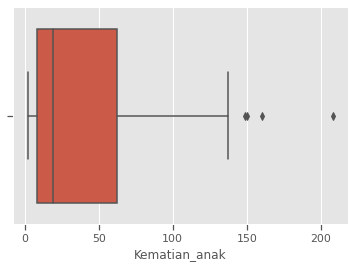

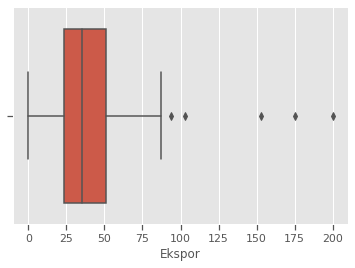

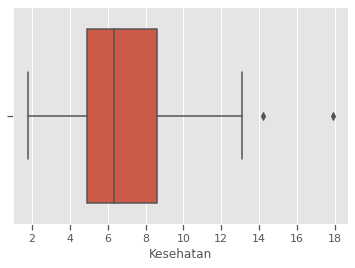

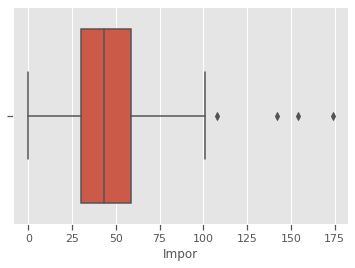

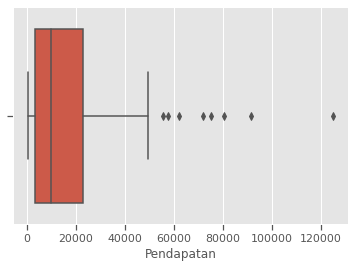

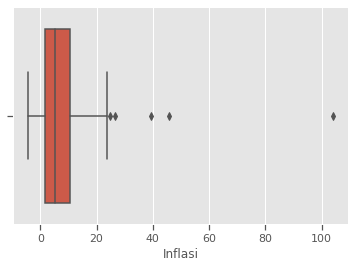

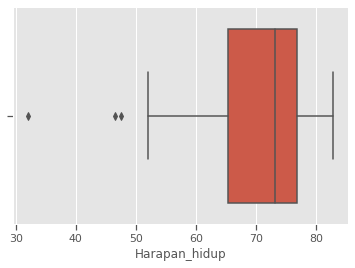

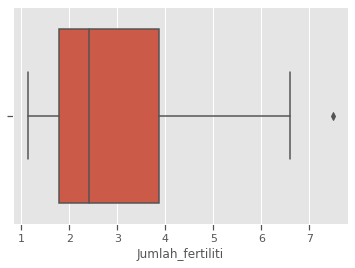

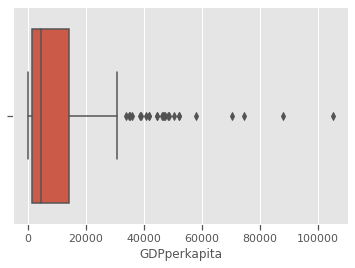

In [ ]:
sns.boxplot(x='Kematian_anak',data=df1)
plt.show()
sns.boxplot(x='Ekspor',data=df1)
plt.show()
sns.boxplot(x='Kesehatan',data=df1)
plt.show()
sns.boxplot(x='Impor',data=df1)
plt.show()
sns.boxplot(x='Pendapatan',data=df1)
plt.show()
sns.boxplot(x='Inflasi',data=df1)
plt.show()
sns.boxplot(x='Harapan_hidup',data=df1)
plt.show()
sns.boxplot(x='Jumlah_fertiliti',data=df1)
plt.show()
sns.boxplot(x='GDPperkapita',data=df1)
plt.show()

In [ ]:
print(get_outlier_iqr(df['GDPperkapita'].values))

[ 51900  46900  44400  35300  47400  58000  46200  40600  41800  41900
  48700  35800  44500  38500 105000  50300  33700  87800  70300  46600
  52100  74600  35000  38900  48400]


In [ ]:
def remove_outlier_iqr(df):
  Q1= df.quantile(0.25)
  Q3= df.quantile(0.75)
  IQR =Q3-Q1
  df_final = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR)))]
  return df_final
df_removed_outlier = remove_outlier_iqr(df1[['Kematian_anak','Ekspor','Kesehatan','Impor','Inflasi','Harapan_hidup','Jumlah_fertiliti']])
df_removed_outlier.dropna(inplace=True)
df_removed_outlier['Pendapatan']=df1['Pendapatan']
df_removed_outlier['GDPperkapita']=df1['GDPperkapita']
df_removed_outlier

,Kematian_anak,Ekspor,Kesehatan,Impor,Inflasi,Harapan_hidup,Jumlah_fertiliti,Pendapatan,GDPperkapita
0,90.2,10.0,7.58,44.9,9.44,56.2,5.82,1610,553
1,16.6,28.0,6.55,48.6,4.49,76.3,1.65,9930,4090
2,27.3,38.4,4.17,31.4,16.10,76.5,2.89,12900,4460
3,119.0,62.3,2.85,42.9,22.40,60.1,6.16,5900,3530
4,10.3,45.5,6.03,58.9,1.44,76.8,2.13,19100,12200
...,...,...,...,...,...,...,...,...,...
161,36.3,31.7,5.81,28.5,16.50,68.8,2.34,4240,1380
162,29.2,46.6,5.25,52.7,2.62,63.0,3.50,2950,2970
164,23.3,72.0,6.84,80.2,12.10,73.1,1.95,4490,1310
165,56.3,30.0,5.18,34.4,23.60,67.5,4.67,4480,1310


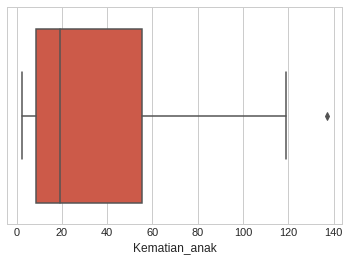

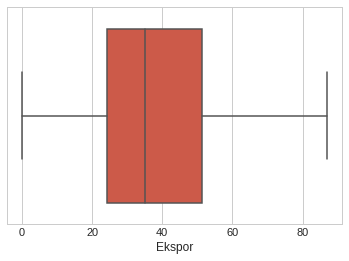

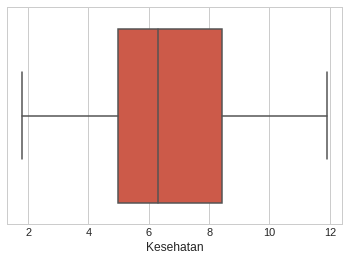

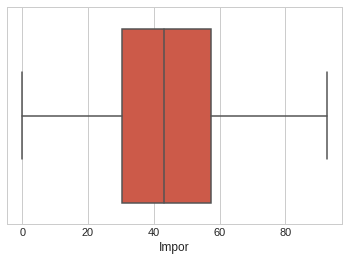

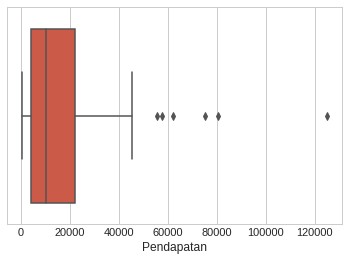

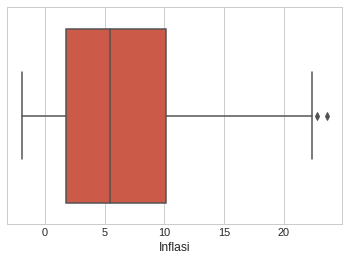

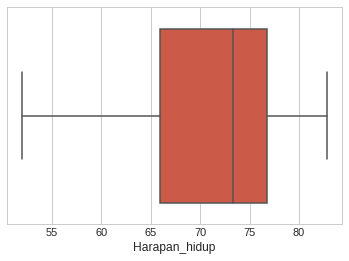

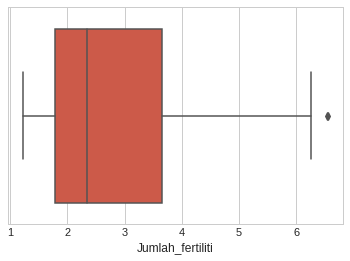

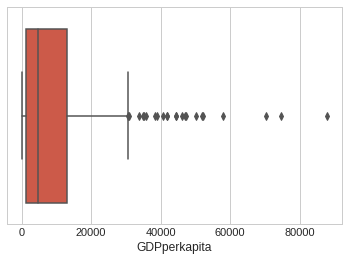

In [ ]:
sns.boxplot(x='Kematian_anak',data=df_removed_outlier)
plt.show()
sns.boxplot(x='Ekspor',data=df_removed_outlier)
plt.show()
sns.boxplot(x='Kesehatan',data=df_removed_outlier)
plt.show()
sns.boxplot(x='Impor',data=df_removed_outlier)
plt.show()
sns.boxplot(x='Pendapatan',data=df_removed_outlier)
plt.show()
sns.boxplot(x='Inflasi',data=df_removed_outlier)
plt.show()
sns.boxplot(x='Harapan_hidup',data=df_removed_outlier)
plt.show()
sns.boxplot(x='Jumlah_fertiliti',data=df_removed_outlier)
plt.show()
sns.boxplot(x='GDPperkapita',data=df_removed_outlier)
plt.show()

In [ ]:
sc = StandardScaler()
df_std = sc.fit_transform(df_removed_outlier.astype(float))
df_std_new=pd.DataFrame(df_std,columns=df1.columns[:])
df_std_new



,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.676923,-1.509821,0.345644,0.045304,0.431789,-1.919933,2.091394,-0.831290,-0.700590
1,-0.521894,-0.564531,-0.062183,0.256192,-0.384293,0.651282,-0.847664,-0.370961,-0.490335
2,-0.202229,-0.018363,-1.004540,-0.724150,1.529790,0.676866,0.026300,-0.206637,-0.468340
3,2.537330,1.236773,-1.527192,-0.068689,2.568440,-1.421040,2.331029,-0.593933,-0.523624
4,-0.710108,0.354502,-0.268076,0.843257,-0.887131,0.715242,-0.509355,0.136396,-0.008239
...,...,...,...,...,...,...,...,...,...
144,0.066648,-0.370221,-0.355184,-0.889441,1.595736,-0.308127,-0.361345,-0.685777,-0.651430
145,-0.145466,0.412270,-0.576916,0.489878,-0.692590,-1.050069,0.456234,-0.757150,-0.556913
146,-0.321730,1.746180,0.052643,2.057286,0.870330,0.241934,-0.636221,-0.671945,-0.655591
147,0.664153,-0.459498,-0.604632,-0.553160,2.766278,-0.474424,1.280862,-0.672498,-0.655591


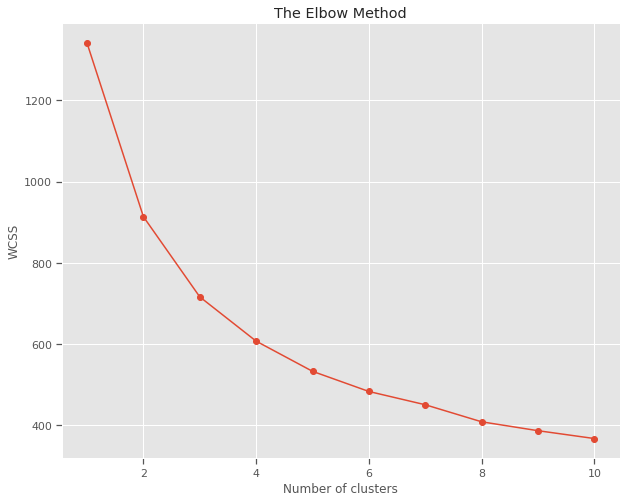

<Figure size 432x288 with 0 Axes>

In [ ]:
wcss = []
for i in range(1,11):
  kmeans= KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
plt.savefig("wcss.png")

In [ ]:
import plotly.express as px
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(df_std_new)
clusters=pd.DataFrame(df_std_new)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

<Figure size 1440x864 with 0 Axes>

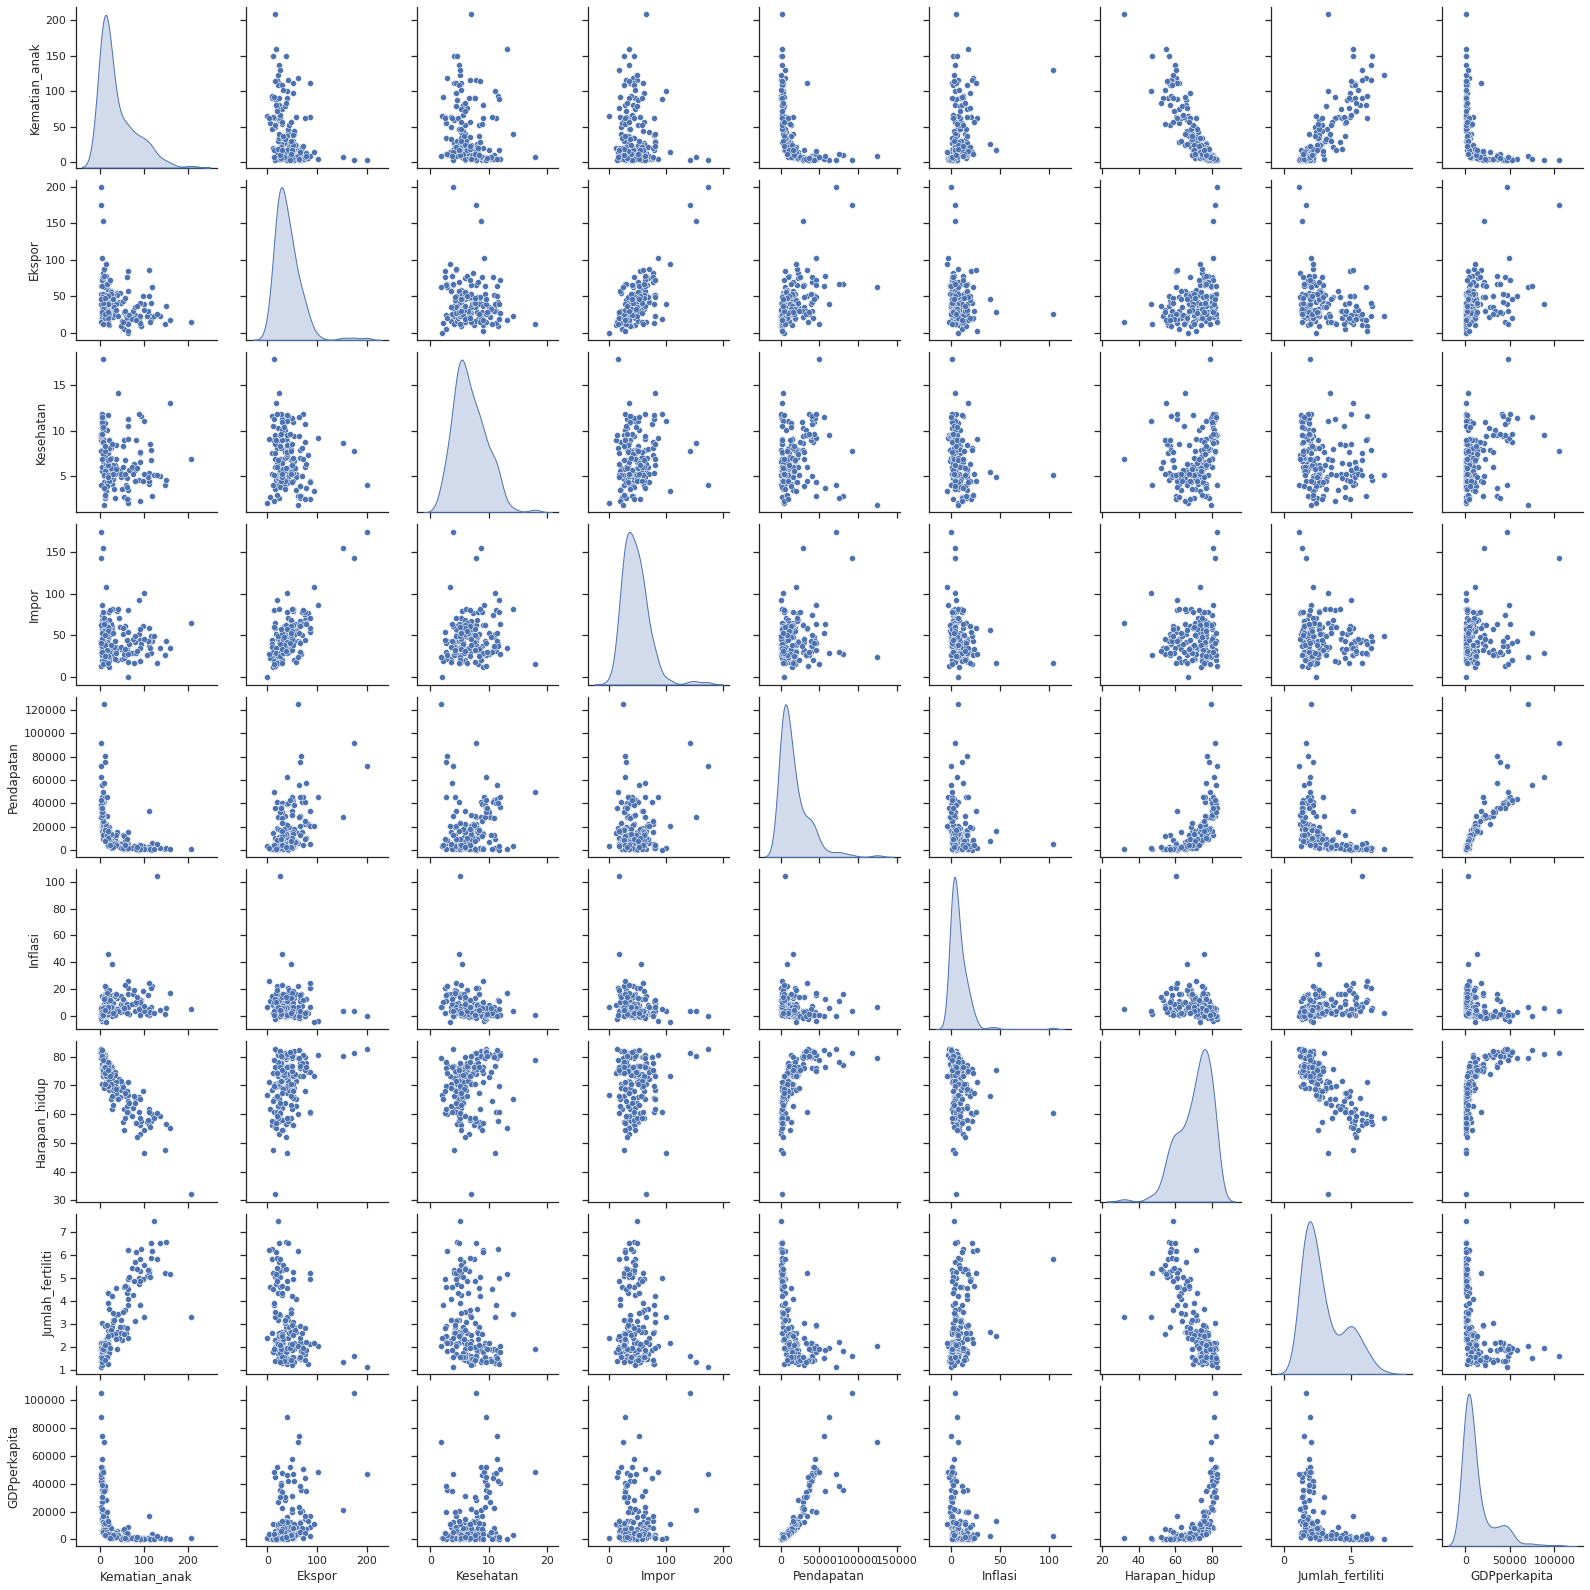

In [ ]:
plt.figure(figsize=(20,12))
sns.set_theme(style="ticks")
sns.pairplot(df1,diag_kind='kde')
plt.savefig('pair_plot.png')


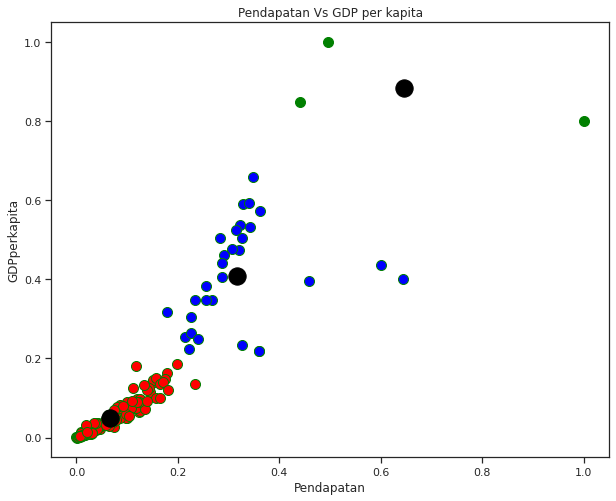

In [ ]:

df2=df_removed_outlier[['Pendapatan','GDPperkapita']]
scaler = preprocessing.MinMaxScaler()
df2_norm = scaler.fit_transform(df2)
#clustering
kmeans_df2=KMeans(n_clusters=3,random_state=42).fit(df2_norm)
labels_df2 = kmeans_df2.labels_
df2_new = pd.DataFrame(data=df2_norm,columns=['Pendapatan','GDPperkapita'])
df2_new['Cluster']=labels_df2

#buat scatterplot
plt.figure(figsize=(10,8))
plt.scatter(x='Pendapatan',y='GDPperkapita',data=df2_new[df2_new.Cluster==0],s=100,c='red',edgecolors='green',linestyle='-')
plt.scatter(x='Pendapatan',y='GDPperkapita',data=df2_new[df2_new.Cluster==1],s=100,c='blue',edgecolors='green',linestyle='-')
plt.scatter(x='Pendapatan',y='GDPperkapita',data=df2_new[df2_new.Cluster==2],s=100,c='green',edgecolors='green',linestyle='-')
centers=kmeans_df2.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],s=300,c='black')
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.title('Pendapatan Vs GDP per kapita')
plt.savefig('3 kluster.png')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df2_new,labels=labels_df2))

0.8984072189087161


In [ ]:
df1

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df2_normal=df_removed_outlier.copy()
df2_normal['Cluster']=labels_df2
df2_mean = df2_normal.groupby('Cluster').mean()
df2_mean
sc = StandardScaler()
df2_mean_std = sc.fit_transform(df2_mean.astype(float))
df2_mean_std = pd.DataFrame(df2_mean_std)

scaler = preprocessing.MinMaxScaler()
names = df2_mean.columns
d = scaler.fit_transform(df2_mean)
df2_mean_normalized = pd.DataFrame(d, columns=names)


In [ ]:
df2_mean

,Kematian_anak,Ekspor,Kesehatan,Impor,Inflasi,Harapan_hidup,Jumlah_fertiliti,Pendapatan,GDPperkapita
Cluster,,,,,,,,,
0,42.120690,36.452578,6.237759,45.260051,7.703784,68.787931,3.136034,8906.732759,4555.620690
1,5.786667,45.973333,8.432667,40.530000,3.647867,79.600000,1.857667,40086.666667,35910.000000
2,5.566667,55.333333,7.596667,35.200000,4.415667,80.900000,1.846667,80933.333333,77566.666667


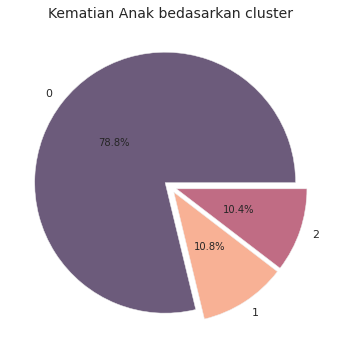

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = df2_mean['Kematian_anak'].keys()
plt.pie(x=df2_mean['Kematian_anak'], autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5,colors=['#6C5B7B','#F8B195','#C06C84'])
plt.title("Kematian Anak bedasarkan cluster", fontsize=14);
pie.savefig("Kematian Anak.png")


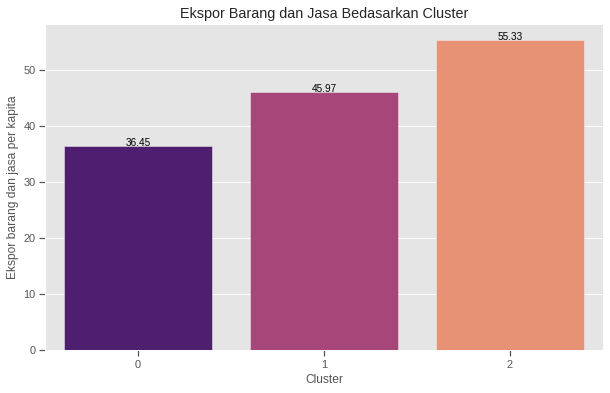

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
g=sns.barplot(x=df2_mean.index,y=df2_mean['Ekspor'].values,palette='magma')
for index, row in df2_mean.iterrows():
    g.text(row.name,row.Ekspor, round(row.Ekspor,2), color='black', ha="center")
plt.style.use('seaborn-whitegrid')
plt.xlabel('Cluster')
plt.ylabel('Ekspor barang dan jasa per kapita')
plt.title('Ekspor Barang dan Jasa Bedasarkan Cluster')
plt.show()
plt.savefig('Ekspor.png')

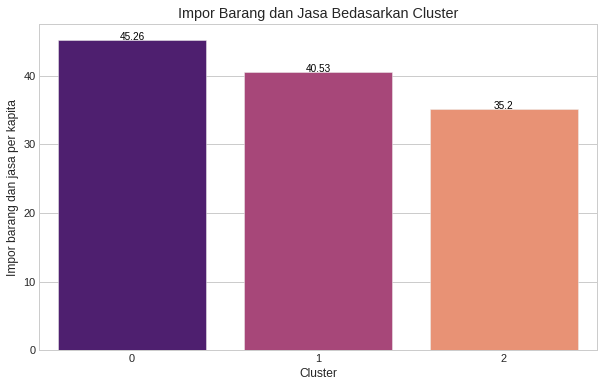

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
h=sns.barplot(x=df2_mean.index,y=df2_mean['Impor'].values,palette='magma')
for index, row in df2_mean.iterrows():
    h.text(row.name,row.Impor, round(row.Impor,2), color='black', ha="center")
plt.style.use('seaborn-whitegrid')
plt.xlabel('Cluster')
plt.ylabel('Impor barang dan jasa per kapita')
plt.title('Impor Barang dan Jasa Bedasarkan Cluster')
plt.show()
plt.savefig('Impor.png')

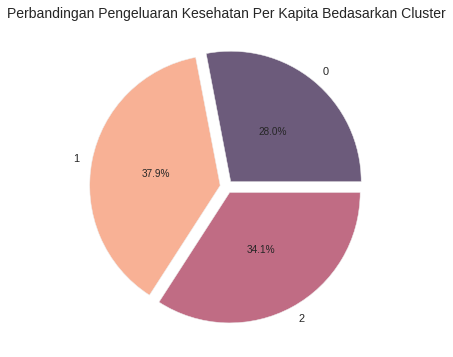

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = df2_mean['Kesehatan'].keys()
plt.pie(x=df2_mean['Kesehatan'], autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5,colors=['#6C5B7B','#F8B195','#C06C84'])
plt.title("Perbandingan Pengeluaran Kesehatan Per Kapita Bedasarkan Cluster", fontsize=14);
pie.savefig("Kesehatan.png")

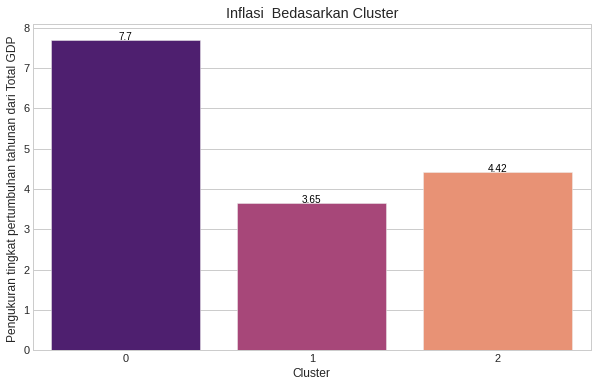

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
h=sns.barplot(x=df2_mean.index,y=df2_mean['Inflasi'].values,palette='magma')
for index, row in df2_mean.iterrows():
    h.text(row.name,row.Inflasi, round(row.Inflasi,2), color='black', ha="center")
plt.style.use('seaborn-whitegrid')
plt.xlabel('Cluster')
plt.ylabel('Pengukuran tingkat pertumbuhan tahunan dari Total GDP ')
plt.title('Inflasi  Bedasarkan Cluster')
plt.show()
plt.savefig('Inflasi.png')

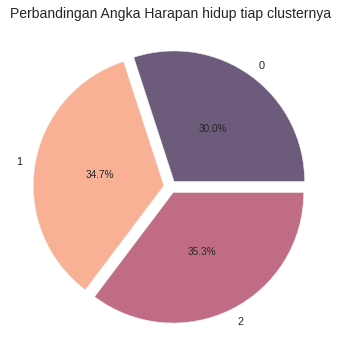

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = df2_mean['Harapan_hidup'].keys()
plt.pie(x=df2_mean['Harapan_hidup'], autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5,colors=['#6C5B7B','#F8B195','#C06C84'])
plt.title("Perbandingan Angka Harapan hidup tiap clusternya", fontsize=14);
pie.savefig("Harapan Hidup.png")

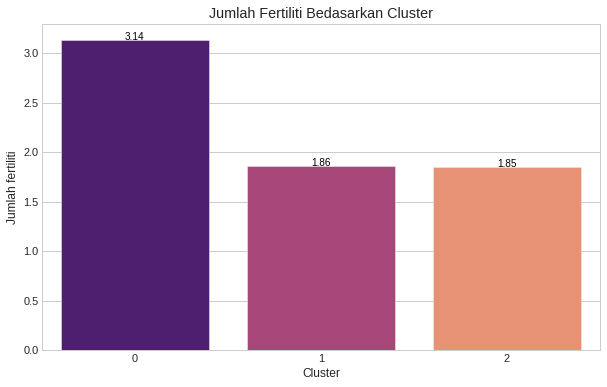

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
h=sns.barplot(x=df2_mean.index,y=df2_mean['Jumlah_fertiliti'].values,palette='magma')
for index, row in df2_mean.iterrows():
    h.text(row.name,row.Jumlah_fertiliti, round(row.Jumlah_fertiliti,2), color='black', ha="center")
plt.style.use('seaborn-whitegrid')
plt.xlabel('Cluster')
plt.ylabel('Jumlah fertiliti')
plt.title('Jumlah Fertiliti Bedasarkan Cluster')
plt.show()
plt.savefig('Jumlah fertiliti.png')

In [ ]:
df_akhir=df_removed_outlier.copy()
df_akhir['Negara']=df['Negara']
df_akhir['Cluster']=labels_df2
df_akhir

,Kematian_anak,Ekspor,Kesehatan,Impor,Inflasi,Harapan_hidup,Jumlah_fertiliti,Pendapatan,GDPperkapita,Negara,Cluster
0,90.2,10.0,7.58,44.9,9.44,56.2,5.82,1610,553,Afghanistan,0
1,16.6,28.0,6.55,48.6,4.49,76.3,1.65,9930,4090,Albania,0
2,27.3,38.4,4.17,31.4,16.10,76.5,2.89,12900,4460,Algeria,0
3,119.0,62.3,2.85,42.9,22.40,60.1,6.16,5900,3530,Angola,0
4,10.3,45.5,6.03,58.9,1.44,76.8,2.13,19100,12200,Antigua and Barbuda,0
...,...,...,...,...,...,...,...,...,...,...,...
161,36.3,31.7,5.81,28.5,16.50,68.8,2.34,4240,1380,Uzbekistan,0
162,29.2,46.6,5.25,52.7,2.62,63.0,3.50,2950,2970,Vanuatu,0
164,23.3,72.0,6.84,80.2,12.10,73.1,1.95,4490,1310,Vietnam,0
165,56.3,30.0,5.18,34.4,23.60,67.5,4.67,4480,1310,Yemen,0


In [ ]:
df_negara=df_akhir[['Negara','Cluster']]

In [ ]:
df_negara0=df_negara[df_negara['Cluster']==0]
df_negara1=df_negara[df_negara['Cluster']==1]
df_negara2=df_negara[df_negara['Cluster']==2]

In [ ]:
df_negara0['Negara']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
161             Uzbekistan
162                Vanuatu
164                Vietnam
165                  Yemen
166                 Zambia
Name: Negara, Length: 116, dtype: object

In [ ]:
df_negara1.shape

(30, 2)

In [ ]:
df_negara2

,Negara,Cluster
114,Norway,2
123,Qatar,2
145,Switzerland,2
